In [55]:
import os
import re
import numpy as np

In [56]:


# Path to the folder containing the files
folder_path = r"C:\Users\deols\OneDrive\Documents\GitHub\qml_rethinking_gen\random_labels\qml_error_save"

# List to store filenames
filenames = os.listdir(folder_path)

# Lists to store unique values
label_types = set()
nqubits = set()
training_data = set()

# Regex patterns to extract label type, nqubits, and training data
label_type_pattern = r"(random_labels|random_states|real_labels)"
nqubits_pattern = r"nqubits_(\d+)"
training_data_pattern = r"training_data_(\d+)"

# Iterate through filenames and extract values
for filename in filenames:
    # Only process .txt files
    if filename.endswith(".txt"):
        label_type_match = re.search(label_type_pattern, filename)
        nqubits_match = re.search(nqubits_pattern, filename)
        training_data_match = re.search(training_data_pattern, filename)
        
        if label_type_match:
            label_types.add(label_type_match.group(1))
        if nqubits_match:
            nqubits.add(int(nqubits_match.group(1)))
        if training_data_match:
            training_data.add(int(training_data_match.group(1)))

# Convert sets to sorted lists
label_types_list = sorted(list(label_types))
nqubits_list = sorted(list(nqubits))
training_data_list = sorted(list(training_data))

# Print the results
print("Label types list:", label_types_list)
print("nqubits list:", nqubits_list)
print("training data list:", training_data_list)


Label types list: ['random_labels']
nqubits list: [8, 16, 32]
training data list: [5, 8, 10, 14, 20]


In [57]:
print("nqubits list:", nqubits_list)
print("training data list:", training_data_list)

nqubits list: [8, 16, 32]
training data list: [5, 8, 10, 14, 20]


In [58]:
nqubits_list.remove(32)

In [59]:
for label_type in label_types_list:
    for nqubit in nqubits_list:
        for training_size in training_data_list:
            filename = f"{label_type}_nqubits_{nqubit}_training_data_{training_size}"
            print(f"Processing {filename}")
            train_error = np.loadtxt(os.path.join(folder_path, f"{filename}_train_error.txt"))
            test_error = np.loadtxt(os.path.join(folder_path, f"{filename}_test_error.txt"))
            gap = test_error - train_error
            print(f"{filename}: train_error = {train_error}, test_error = {test_error}, gap = {gap}")


Processing random_labels_nqubits_8_training_data_5
random_labels_nqubits_8_training_data_5: train_error = 0.0, test_error = 0.732, gap = 0.732
Processing random_labels_nqubits_8_training_data_8
random_labels_nqubits_8_training_data_8: train_error = 0.0, test_error = 0.743, gap = 0.743
Processing random_labels_nqubits_8_training_data_10
random_labels_nqubits_8_training_data_10: train_error = 0.0, test_error = 0.728, gap = 0.728
Processing random_labels_nqubits_8_training_data_14
random_labels_nqubits_8_training_data_14: train_error = 0.0714285714285714, test_error = 0.762, gap = 0.6905714285714286
Processing random_labels_nqubits_8_training_data_20
random_labels_nqubits_8_training_data_20: train_error = 0.19999999999999996, test_error = 0.766, gap = 0.5660000000000001
Processing random_labels_nqubits_16_training_data_5
random_labels_nqubits_16_training_data_5: train_error = 0.0, test_error = 0.742, gap = 0.742
Processing random_labels_nqubits_16_training_data_8
random_labels_nqubits_16_

Processing random_labels_nqubits_8_training_data_5
random_labels_nqubits_8_training_data_5: train_error = 0.0, test_error = 0.732, gap = 0.732
Processing random_labels_nqubits_8_training_data_8
random_labels_nqubits_8_training_data_8: train_error = 0.0, test_error = 0.743, gap = 0.743
Processing random_labels_nqubits_8_training_data_10
random_labels_nqubits_8_training_data_10: train_error = 0.0, test_error = 0.728, gap = 0.728
Processing random_labels_nqubits_8_training_data_14
random_labels_nqubits_8_training_data_14: train_error = 0.0714285714285714, test_error = 0.762, gap = 0.6905714285714286
Processing random_labels_nqubits_8_training_data_20
random_labels_nqubits_8_training_data_20: train_error = 0.19999999999999996, test_error = 0.766, gap = 0.5660000000000001


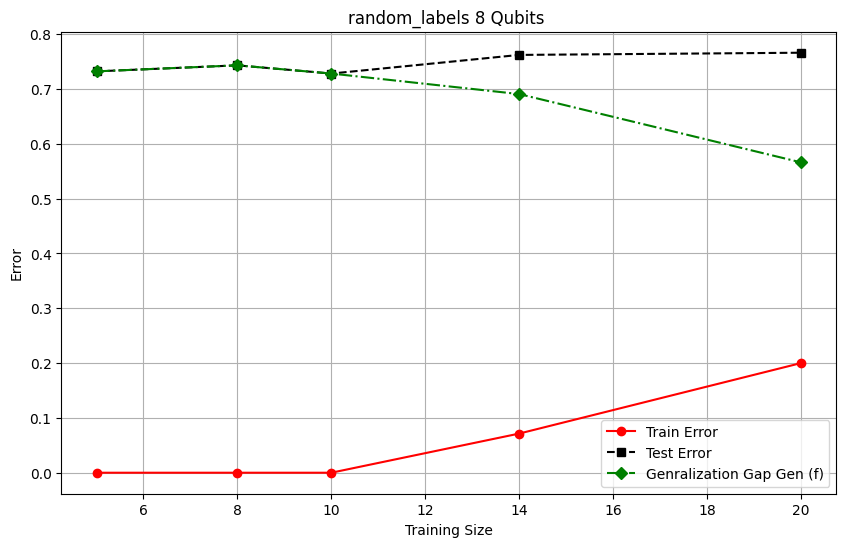

Processing random_labels_nqubits_16_training_data_5
random_labels_nqubits_16_training_data_5: train_error = 0.0, test_error = 0.742, gap = 0.742
Processing random_labels_nqubits_16_training_data_8
random_labels_nqubits_16_training_data_8: train_error = 0.0, test_error = 0.74, gap = 0.74
Processing random_labels_nqubits_16_training_data_10
random_labels_nqubits_16_training_data_10: train_error = 0.0, test_error = 0.75, gap = 0.75
Processing random_labels_nqubits_16_training_data_14
random_labels_nqubits_16_training_data_14: train_error = 0.0714285714285714, test_error = 0.752, gap = 0.6805714285714286
Processing random_labels_nqubits_16_training_data_20
random_labels_nqubits_16_training_data_20: train_error = 0.19999999999999996, test_error = 0.761, gap = 0.561


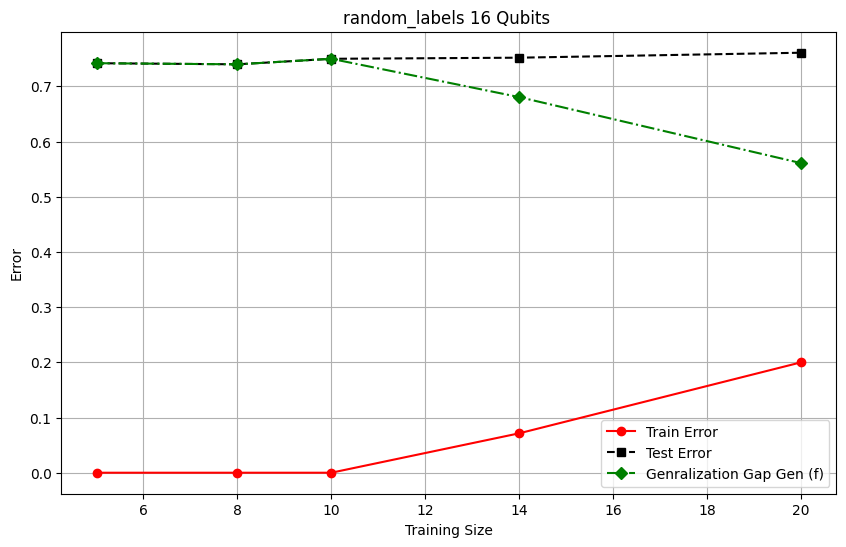

In [60]:
import numpy as np
import matplotlib.pyplot as plt


# Initialize lists to store the data for plotting


colors = ['red','black', 'g', 'm', 'y', 'k']
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'x']         # Add more markers as needed
linestyles = ['-', '--', '-.', ':']                      # Add more linestyles as needed

# Loop over all combinations of label_type, nqubit, and training_data
for label_type in label_types_list:
    for nqubit in nqubits_list:
        train_errors = []
        test_errors = []
        gaps = []
        training_sizes = []
        for training_size in training_data_list:
            filename = f"{label_type}_nqubits_{nqubit}_training_data_{training_size}"
            print(f"Processing {filename}")
            
            # Load the error values
            try:
                train_error = np.loadtxt(os.path.join(folder_path, f"{filename}_train_error.txt"))
                test_error = np.loadtxt(os.path.join(folder_path, f"{filename}_test_error.txt"))
            except Exception as e:
                print(f"Error loading files for {filename}: {e}")
                continue
            
            # Calculate the gap
            gap = test_error - train_error
            
            # Append the data to lists for plotting
            train_errors.append(train_error)
            test_errors.append(test_error)
            gaps.append(gap)
            training_sizes.append(training_size)

            # Print the results
            print(f"{filename}: train_error = {train_error}, test_error = {test_error}, gap = {gap}")

        # Now, let's plot the errors and gap vs. training size
        plt.figure(figsize=(10, 6))

        # Plot train error, test error, and gap
        plt.plot(training_sizes, train_errors, label='Train Error', marker=markers[0],color=colors[0],linestyle=linestyles[0])
        plt.plot(training_sizes, test_errors, label='Test Error', marker=markers[1],color=colors[1],linestyle=linestyles[1])
        plt.plot(training_sizes, gaps, label='Genralization Gap Gen (f)', marker=markers[2],color=colors[2],linestyle=linestyles[2])

        # Labels and title
        plt.xlabel('Training Size')
        plt.ylabel('Error')
        plt.title(f'{label_type} {nqubit} Qubits ')
        plt.legend()

        # Show plot
        plt.grid(True)
        plt.show()
